# Cálculo de los descriptores energéticos de los modelos de Boltz con CCharPPI
Autor: Luis García Aguirre

Para poder correr CCharPPI tanto en servidor como local, necesitamos estructurar los archivos de una manera específica. Ésto puede consultarse en: https://life.bsc.es/pid/ccharppi/info/faq_and_help. Básicamente hay que introducir los archivos `.pdb` de los modelos que se quieran analizar y un archivo `job.csv` donde se indica peculiarmente cuál cadena es receptor y cuál ligando de todos los modelos de **Boltz2** como base para realizar los cálculos.  

Los modelos que se analizarán son tanto los modelos mutados como los modelos salvajes o *wild-type*, ambos generados por Boltz2. Además, se creará el archivo `job.csv` con todos los modelos que se analizarán. 

Finalmente, se comprimirán los archivos dentro de la carpeta para que **CCharPPI** funcione correctamente al descomprimir la carpeta. Necesita que los archivos se descompriman directamente, no dentro de otra carpeta. Documentado en: https://life.bsc.es/pid/ccharppi/info/faq_and_help.

\* Esta parte es la continuación de la modelización con Boltz2 de los complejos mutados y salvajes. 

- [`22dataset_mutations_YAML` ](../22dataset_mutations_YAML/)

- [`22dataset_SIN_muts_YAML`](../22dataset_SIN_muts_YAML/YAML_and_SH_maker.ipynb)


### Advertencia:

Se creará este script para satisfacer las premisas expuestas. Sin embargo, por falta de tiempo, se realizarán los siguientes pasos partiendo de un subconjunto que facilite la ejecución y demostración del funcionamiento del script (descrito en Punto 2, *Paŕentesis*).

In [65]:
# File and directory management:
import os
import shutil

# PDB file manegement and parsing:
from Bio.PDB import PDBParser
from Bio.PDB.PDBParser import PDBParser 
from Bio.PDB import PDBParser
from Bio.PDB.Polypeptide import is_aa

## 1. Creación de la carpeta destinataria de todos los archivos: `my_data`


In [44]:
if not os.path.exists('my_data'):
    os.makedirs('my_data')

## 2. Copia de los `.pdb`

Para obtener las rutas de los archivos, reutilizaré parte del código hecho en [la extracción de características](../22dataset_Boltz2_Features/feature_models_extractor.ipynb).

In [45]:
def get_boltz_pdb_paths(models_path, output_log):
    pdb_path_list = []
    exceptions_list = []
    log = []

    # Crear lista de rutas
    for result in os.listdir(models_path):
        try:
            cplx_name = result[14:]
            pdb_path = os.path.join(models_path, result, 'predictions', cplx_name)
            prediction_files = os.listdir(pdb_path)
            pdb_list = [
                os.path.join(pdb_path, f) 
                for f in prediction_files if f.endswith('.pdb')
            ]
            pdb_path_list.extend(pdb_list) # extend (no append) para no crear una lista de listas
            log.extend(pdb_list)

        except Exception as e:
            exceptions_list.append(cplx_name)
            log.append(f"{cplx_name} - {str(e)}")
    
    # Escribir log
    with open(output_log+'.log', 'w') as log_file:
        texto = '\n'.join(log)
        log_file.write(texto)

    return pdb_path_list, exceptions_list

In [62]:
# Obtener rutas mutantes
ruta_modelos_muts = '../22dataset_mutations_YAML/Models'
pdb_path_list, exceptions_list = get_boltz_pdb_paths(ruta_modelos_muts, 'rutas_pdb_mutaciones')

# Obtener rutas wild type (no se puede usar extend() o += en una tupla)
ruta_modelos_wt = '../22dataset_SIN_muts_YAML/Models'
pdb_path_list_wt, exceptions_list_wt = get_boltz_pdb_paths(ruta_modelos_wt, 'rutas_pdb_wild_type')

# Combinar ambas listas
pdb_path_list += pdb_path_list_wt
exceptions_list += exceptions_list_wt

In [64]:
# exceptions_list.sort()
# exceptions_list

In [48]:
457 - 438


19

### (Paréntesis)

Por lo anteriormente expuesto utilizaré primero como prueba un sólo complejo, pero lo dejo preparado para su generalización y automatización. Por tanto, redefino `pdb_path_list` para minimizar la carga computacional.  

El complejo utilizado será **1K8R**, que es un caso aparentemente simpleo: no es grande y sólo tiene un replicado biológico y un modelo en el cristal de SKEMPI. Además, sólo tiene 19 mutaciones (a diferencia de 1A22, que es igual excepto por que tiene 57 mutaciones).

In [49]:
1 * 50 + 19 * 25

525

En principio, espero 525 archivos `.pdb`.

In [50]:
subsample_pdb_list = [
    file
    for file in pdb_path_list
    if '1K8R' in file
]

len(subsample_pdb_list)

525

Todo correcto, procedo:

In [51]:
ruta_destino = 'my_data'

In [52]:
# for ruta_origen in pdb_path_list:
for ruta_origen in subsample_pdb_list:
    if os.path.isfile(ruta_origen):
        nombre_archivo = os.path.basename(ruta_origen)
        ruta_final = os.path.join(ruta_destino, nombre_archivo)
        try:
            shutil.copy(ruta_origen, ruta_destino)
            print(f"Copiado: {ruta_origen} -> {ruta_destino}")
        except Exception as e:
            print(f"Error copiando {ruta_origen}: {e}")
    else:
        print(f"No encontrado (omitido): {ruta_origen}")

Copiado: ../22dataset_mutations_YAML/Models/boltz_results_1K8R_B.K35A/predictions/1K8R_B.K35A/1K8R_B.K35A_model_22.pdb -> my_data
Copiado: ../22dataset_mutations_YAML/Models/boltz_results_1K8R_B.K35A/predictions/1K8R_B.K35A/1K8R_B.K35A_model_14.pdb -> my_data
Copiado: ../22dataset_mutations_YAML/Models/boltz_results_1K8R_B.K35A/predictions/1K8R_B.K35A/1K8R_B.K35A_model_1.pdb -> my_data
Copiado: ../22dataset_mutations_YAML/Models/boltz_results_1K8R_B.K35A/predictions/1K8R_B.K35A/1K8R_B.K35A_model_23.pdb -> my_data
Copiado: ../22dataset_mutations_YAML/Models/boltz_results_1K8R_B.K35A/predictions/1K8R_B.K35A/1K8R_B.K35A_model_18.pdb -> my_data
Copiado: ../22dataset_mutations_YAML/Models/boltz_results_1K8R_B.K35A/predictions/1K8R_B.K35A/1K8R_B.K35A_model_17.pdb -> my_data
Copiado: ../22dataset_mutations_YAML/Models/boltz_results_1K8R_B.K35A/predictions/1K8R_B.K35A/1K8R_B.K35A_model_7.pdb -> my_data
Copiado: ../22dataset_mutations_YAML/Models/boltz_results_1K8R_B.K35A/predictions/1K8R_B.K35

## 3. Creación del `job.csv`

La estructura de este `.csv` es peculiar. En cada línea debe aparecer primero el receptor y después el ligando. Además, las columnas están separadas por dos puntos (**:**) en vez de comas o punto y comas(**,**/**;**). Tal que:  

- `archivo_receptor` **:** `nombre_cadena` **:** `archivo_ligando` **:** `nombre_cadena` (todo junto)

Parece que la cadena del receptor no es universalmente *A* en los archivos y tampoco la cadena del ligando es *B*; o viceversa. Por tanto, es necesario parsear los archivos y comprobar la longitud de cada cadena antes de asignarlas en el `.csv`. Para ello, tomaré de partida para este parseo una función creada en un paso paralelo donde se calculó el capriRMSD para un análisis distinto: [INI_generator_and_capriRMSD_analysis.ipynb](../capri_RMSD/INI_generator_and_capriRMSD_analysis.ipynb) punto 2.

In [54]:
# (función modificada)

def rec_and_lig_chains(pdb_file=''):
    # Parsear estructura
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure(id=f'{pdb_file[:-3]}_fold_{pdb_file[-1]}', file=pdb_file)

    # Definir variables
    dimere_list = []
    pdb_file = os.path.basename(pdb_file)
    
    # Guardar tuplas de pares receptor-ligando con archivo asociado en formato de diccionario
    for model in structure:
        # Obtener las cadenas que contienen al menos un residuo aminoacídico estándar, 
        chains = [chain for chain in model.get_chains() 
        # descartando cadenas compuestas solo por residuos como NAG, EMC, etc.
                  if any(is_aa(residue, standard=True) for residue in chain)]
        
        chain_n = 1
        # Asumimos que sólo 2 pares de cadenas, si no es el caso se añadirían y podríamos verlo al buscar errores
        for i in range(len(chains)):
            if i + 1 >= len(chains):
                break  # Evitar desbordamiento si hay un número impar de cadenas

            chain1 = chains[i]
            chain2 = chains[i + 1]

            residues1 = list(chain1.get_residues())
            residues2 = list(chain2.get_residues())

            # Determinar cuál es receptor y cuál ligando
            if len(residues1) >= len(residues2):
                receptor = chain1.id
                ligand = chain2.id
                # print(len(residues1), len(residues2))
            else:
                receptor = chain2.id
                ligand = chain1.id
                # print(len(residues1), len(residues2))

            # Añadir al diccionario
            dimere_list.extend([receptor, ligand])

    return dimere_list

In [55]:
with open('./my_data/job.csv', 'w') as f:
    # for pdf_file in pdb_path_list:
    for pdf_file in subsample_pdb_list:
        try:
            cplx_mod_pdb = os.path.basename(pdf_file)
            chains = rec_and_lig_chains(pdf_file) 
            text_line = f'{cplx_mod_pdb}:{chains[0]}:{cplx_mod_pdb}:{chains[1]}\n'
            f.writelines(text_line)
        except Exception as e:
            print(e)

## 4. Compresión de la carpeta `my_data`

Pasamos a comprimir los archivos desde dentro de la carpeta. Este paso es muy importante ya que CCharPPI está preparado para descomprimir la carpeta que subas al servidor y obtener los archivos directamente. Si se comprimiesen de otra manera y descomprimiese una carpeta, saltaría un error y no podría realizar la petición adecuadamente:

"*If the files are stored within a directory, the server will report a malformed compress file. In other words, the files should be directly compressed without any folder.*"

In [40]:
# pwd
# ls -l
# cd my_data/
# tar -czvf ../my_data.tgz job.csv *.pdb
# cd ..

Este paso puede realizarse directamente desde la terminal de python o la terminal de Bash dentro de la carpeta donde se encuentra este archivo que, al fin y al cabo, es el directorio de trabajo de este *markdown*. O también, correr el siguiente chunk:

In [58]:
!pwd
!ls -l
!cd my_data && tar -czvf ../my_data.tgz job.csv *.pdb
!cd ..

/home/luigaragu/Documents/CCharPPI


total 2108
-rw-rw-r-- 1 luigaragu luigaragu   88641 ago 21 14:29 CCharPPI_analysis.ipynb
drwxrwxr-x 2 luigaragu luigaragu    4096 ago 22 09:00 e
-rw-rw-r-- 1 luigaragu luigaragu   84318 ago 21 13:40 image.png
drwxrwxr-x 2 luigaragu luigaragu  581632 ago 22 09:00 my_data
-rw-rw-r-- 1 luigaragu luigaragu 1307009 ago 22 08:54 rutas_pdb_mutaciones.log
-rw-rw-r-- 1 luigaragu luigaragu   83757 ago 22 08:54 rutas__pdb_wild_type.log
job.csv
1K8R_A.D33A_model_0.pdb
1K8R_A.D33A_model_10.pdb
1K8R_A.D33A_model_11.pdb
1K8R_A.D33A_model_12.pdb
1K8R_A.D33A_model_13.pdb
1K8R_A.D33A_model_14.pdb
1K8R_A.D33A_model_15.pdb
1K8R_A.D33A_model_16.pdb
1K8R_A.D33A_model_17.pdb
1K8R_A.D33A_model_18.pdb
1K8R_A.D33A_model_19.pdb
1K8R_A.D33A_model_1.pdb
1K8R_A.D33A_model_20.pdb
1K8R_A.D33A_model_21.pdb
1K8R_A.D33A_model_22.pdb
1K8R_A.D33A_model_23.pdb
1K8R_A.D33A_model_24.pdb
1K8R_A.D33A_model_2.pdb
1K8R_A.D33A_model_3.pdb
1K8R_A.D33A_model_4.pdb
1K8R_A.D33A_model_5.pdb
1K8R_A.D33A_model_6.pdb
1K8R_A.D33A_model_7.

Una vez tengo `my_data.tgz` en nuestro directorio de CCharPPI, podemos subirlo al servidor: https://life.bsc.es/pid/ccharppi#. La página web pedirá un correo y se sube el archivo `.tgz` en la opción de subida:  
-  **Batch mode**: compressed job file (.zip, .tgz)

Es posible que salte error con el número de estructuras subidas por lo que es posible que haya que solicitar al servidor mayor capacidad.

Se seleccionan todos los descriptores marcando la opción:  

- **Select**/Deselect all descriptors

Justo antes de subir el archivo vemos el resumen previo y una tabla desplazable con la gran multitud de métricas que se calcularán con CCharPPI:

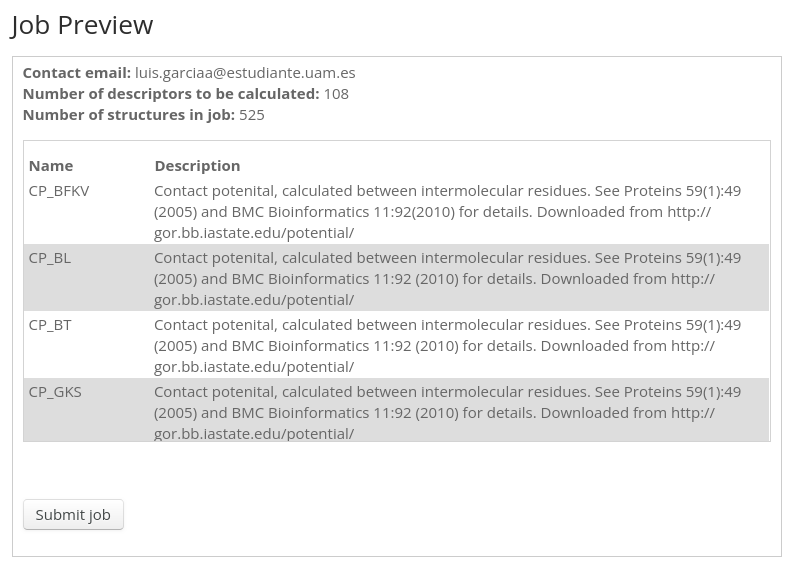

Cuando termine de calcularse este trabajo llegará una notificación al correo con un enlace desde donde descargar un archivo "`results.csv`" que he renombrado como : [results_1K8R.csv](results_1K8R.csv) y movido a esta carpeta de trabajo (`CCharPPI/`).